In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import classification_report

### 1. Get all the labels

In [2]:
mypath = 'C:/Users/Yinzi/Desktop/Project for machin learning/Working on this project/UTK Face Dataset/UTK face Crop/UTKFace crop'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
df = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [3]:
df.head()

,age,gender,race,file
0,100,0,0,C:/Users/Yinzi/Desktop/Project for machin lear...
1,100,0,0,C:/Users/Yinzi/Desktop/Project for machin lear...
2,100,1,0,C:/Users/Yinzi/Desktop/Project for machin lear...
3,100,1,0,C:/Users/Yinzi/Desktop/Project for machin lear...
4,100,1,0,C:/Users/Yinzi/Desktop/Project for machin lear...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23705 non-null  object
 1   gender  23705 non-null  object
 2   race    23705 non-null  object
 3   file    23705 non-null  object
dtypes: object(4)
memory usage: 740.9+ KB


In [5]:
df.count()

age       23705
gender    23705
race      23705
file      23705
dtype: int64

In [6]:
df.describe()

,age,gender,race,file
count,23705,23705,23705,23705
unique,104,2,5,23705
top,26,0,0,C:/Users/Yinzi/Desktop/Project for machin lear...
freq,2197,12391,10078,1


In [7]:
df['gender'].unique()

array(['0', '1'], dtype=object)

In [8]:
df['race'].unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [9]:
df['age'].unique()

array(['100', '101', '103', '105', '10', '110', '111', '115', '116', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '1', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '2', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '3', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '4', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59', '5', '60', '61',
       '62', '63', '64', '65', '66', '67', '68', '69', '6', '70', '71',
       '72', '73', '74', '75', '76', '77', '78', '79', '7', '80', '81',
       '82', '83', '84', '85', '86', '87', '88', '89', '8', '90', '91',
       '92', '93', '95', '96', '99', '9'], dtype=object)

In [10]:
df['age']= df['age'].astype('int')
df['gender']= df['gender'].astype('int')
df['race']= df['race'].astype('int')
df.dtypes

age        int32
gender     int32
race       int32
file      object
dtype: object

In [11]:
df.head()

,age,gender,race,file
0,100,0,0,C:/Users/Yinzi/Desktop/Project for machin lear...
1,100,0,0,C:/Users/Yinzi/Desktop/Project for machin lear...
2,100,1,0,C:/Users/Yinzi/Desktop/Project for machin lear...
3,100,1,0,C:/Users/Yinzi/Desktop/Project for machin lear...
4,100,1,0,C:/Users/Yinzi/Desktop/Project for machin lear...


### 2. show the image

In [12]:
df['file'][0]

'C:/Users/Yinzi/Desktop/Project for machin learning/Working on this project/UTK Face Dataset/UTK face Crop/UTKFace crop/100_0_0_20170112213500903.jpg.chip.jpg'

In [13]:
image1 = plt.imread(df['file'][0])
image1.shape

(200, 200, 3)

In [14]:
image1[0:3]

array([[[215, 206, 201],
        [213, 204, 199],
        [212, 203, 198],
        ...,
        [ 89,  93, 102],
        [ 90,  94, 105],
        [ 93,  97, 108]],

       [[213, 204, 199],
        [211, 202, 197],
        [214, 205, 200],
        ...,
        [ 90,  94, 103],
        [ 91,  95, 106],
        [ 94,  98, 109]],

       [[211, 202, 197],
        [206, 197, 192],
        [210, 201, 196],
        ...,
        [ 91,  95, 104],
        [ 92,  96, 107],
        [ 96, 100, 111]]], dtype=uint8)

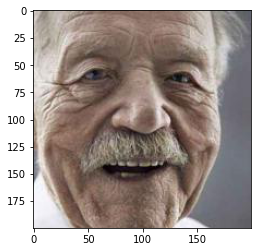

In [15]:
plt.imshow(image1)
plt.show()

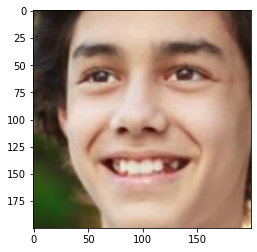

In [16]:
image2 = plt.imread(df['file'][100])
plt.imshow(image2)
plt.show()

### 3. Gradient Boosting model processing

In [17]:
df.head(3)

,age,gender,race,file
0,100,0,0,C:/Users/Yinzi/Desktop/Project for machin lear...
1,100,0,0,C:/Users/Yinzi/Desktop/Project for machin lear...
2,100,1,0,C:/Users/Yinzi/Desktop/Project for machin lear...


In [18]:
images = []
for img_path in df['file']:
    image = plt.imread(img_path)
    images.append(image)

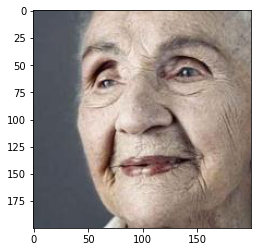

In [25]:
plt.imshow(images[3])

In [31]:
images[3].shape

(200, 200, 3)

In [19]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

In [33]:
X_train, X_test, y_train, y_test = train_test_split(images, df['gender'])

In [37]:
len(X_train), len(X_test), len(y_train), len(y_test)

(17778, 5927, 17778, 5927)

In [38]:
X_train[0].shape

(200, 200, 3)

In [39]:
y_train.shape

(17778,)

In [42]:
y_train[0:5]

12922    0
3311     1
3579     1
22274    0
22471    1
Name: gender, dtype: int32

In [ ]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

In [32]:
X_train.shape

(17778, 120000)

In [22]:
nsamples, nx, ny, nrgb = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny*nrgb))
nsamples, nx, ny, nrgb = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny*nrgb))

In [23]:
gbc.fit(X_train,y_train)

MemoryError: Unable to allocate 7.95 GiB for an array with shape (17778, 120000) and data type float32

In [ ]:
y_pred = pred=gbc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print("GBC accuracy is %2.2f" % accuracy_score( 
     y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))